In [12]:
from wLSM_utils import *
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
n = 500
m = 50
c0 = 5

ase5, ase10 = wHardy_Weinberg(n, m, c0, 10, acorn=1)
ase5, ase20 = wHardy_Weinberg(n, m, c0, 20, acorn=1)
ase5, ase100 = wHardy_Weinberg(n, m, c0, 100, acorn=1)

In [3]:
X_hat5 = ase5.latent_left_
sv5 = ase5.singular_values_

X_hat10 = ase10.latent_left_
sv10 = ase10.singular_values_

X_hat20 = ase20.latent_left_
sv20 = ase20.singular_values_

X_hat100 = ase100.latent_left_
sv100 = ase100.singular_values_

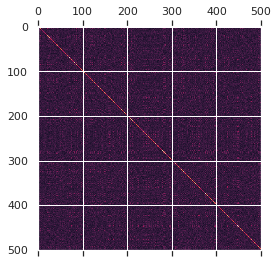

In [24]:
P = X_hat5 @ X_hat5.T
plt.matshow(X_hat5 @ X_hat5.T)

np.mean(P)
P1 = P - np.diag(np.diag(P))

In [25]:
P1

array([[ 0.        ,  0.73564243,  0.18929565, ...,  0.47241854,
         0.74279232,  0.57149743],
       [ 0.73564243,  0.        ,  0.13998159, ..., -0.65398228,
        -0.01802895,  0.57715001],
       [ 0.18929565,  0.13998159,  0.        , ...,  0.95183496,
        -0.07459562,  0.9500368 ],
       ...,
       [ 0.47241854, -0.65398228,  0.95183496, ...,  0.        ,
         0.19756567, -0.20187754],
       [ 0.74279232, -0.01802895, -0.07459562, ...,  0.19756567,
         0.        ,  0.23632162],
       [ 0.57149743,  0.57715001,  0.9500368 , ..., -0.20187754,
         0.23632162,  0.        ]])

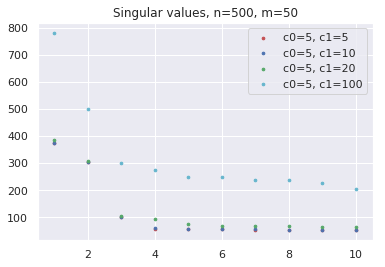

In [19]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.arange(1, len(sv5[:10]) + 1), sv5[:10], c = 'r', s=7, label = 'c0=5, c1=5')
ax.scatter(np.arange(1, len(sv10[:10]) + 1), sv10[:10], c = 'b', s=7, label = 'c0=5, c1=10')
ax.scatter(np.arange(1, len(sv20[:10]) + 1), sv20[:10], c = 'g', s=7, label = 'c0=5, c1=20')
ax.scatter(np.arange(1, len(sv100[:10]) + 1), sv100[:10], c = 'c', s=7, label = 'c0=5, c1=100')
ax.set_title('Singular values, n=%i, m=%i'%(n, m))
ax.legend()
plt.savefig('singular_values_LSM_n%i_m%i_c%ic%ic%ic%i100.png'%(n, m, 5, 10, 20, 100))

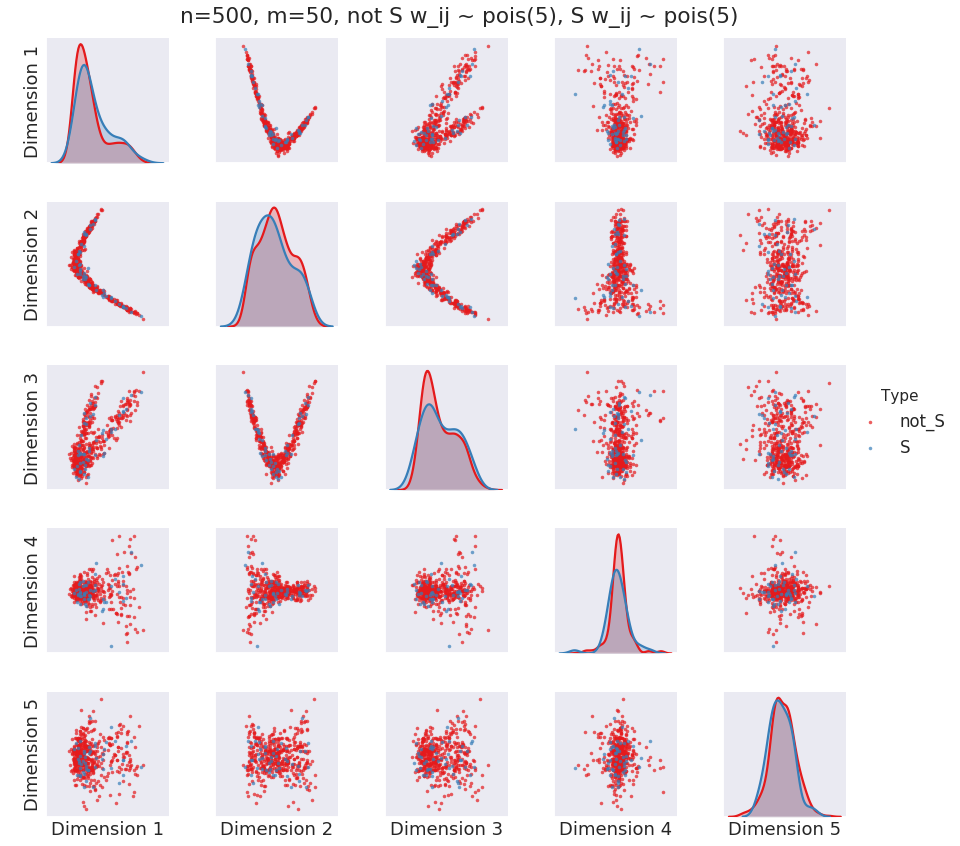

In [14]:
%matplotlib inline
np.random.seed(1)
V1 = np.random.choice(range(n), m, replace=False)

c = np.array(['not_S']*n)
c[V1] = ['S']*m

pairplot(ase5.latent_left_[:, :5], c, title='n=%i, m=%i, not S w_ij ~ pois(%i), S w_ij ~ pois(%i)'%(n, m, 5, 5))
plt.savefig('pairplots_LSM_n%i_m%i_c%ic%i.png'%(n, m, 5, 5))

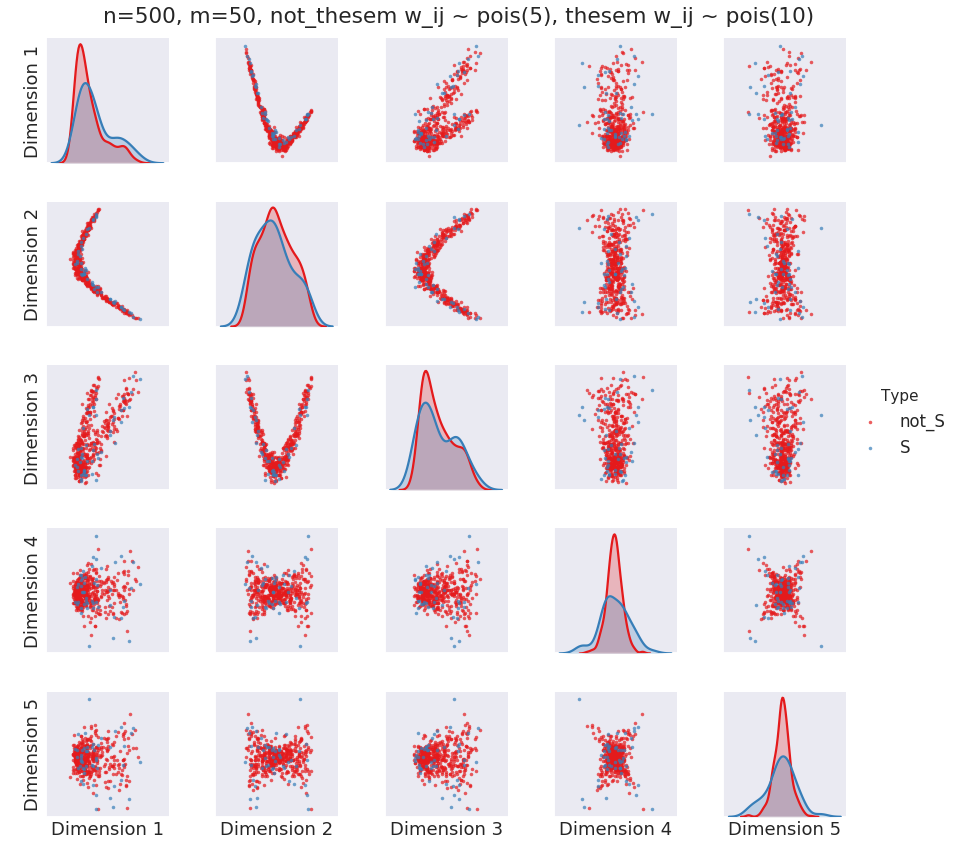

In [15]:
pairplot(ase10.latent_left_[:, :5], c, title='n=%i, m=%i, not_thesem w_ij ~ pois(%i), thesem w_ij ~ pois(%i)'%(n, m, 5, 10))
plt.savefig('pairplots_LSM_n%i_m%i_c%ic%i.png'%(n, m, 5, 10))

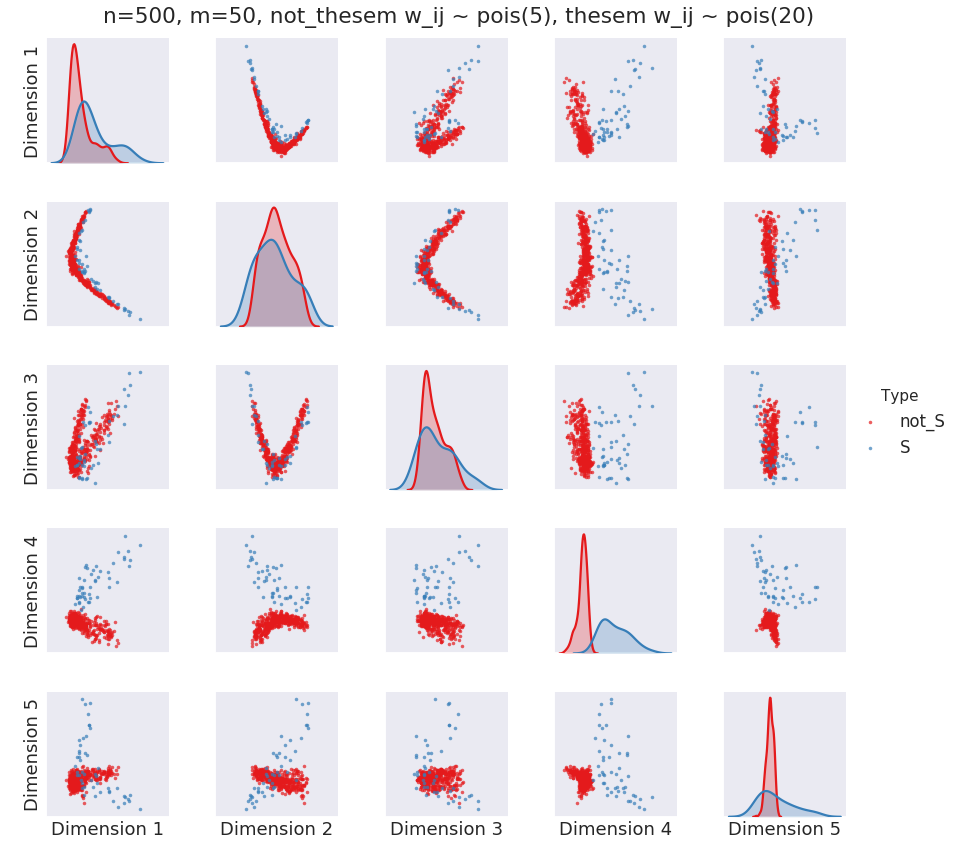

In [16]:
pairplot(ase20.latent_left_[:, :5], c, title='n=%i, m=%i, not_thesem w_ij ~ pois(%i), thesem w_ij ~ pois(%i)'%(n, m, 5, 20))
plt.savefig('pairplots_LSM_n%i_m%i_c%ic%i.png'%(n, m, 5, 20))

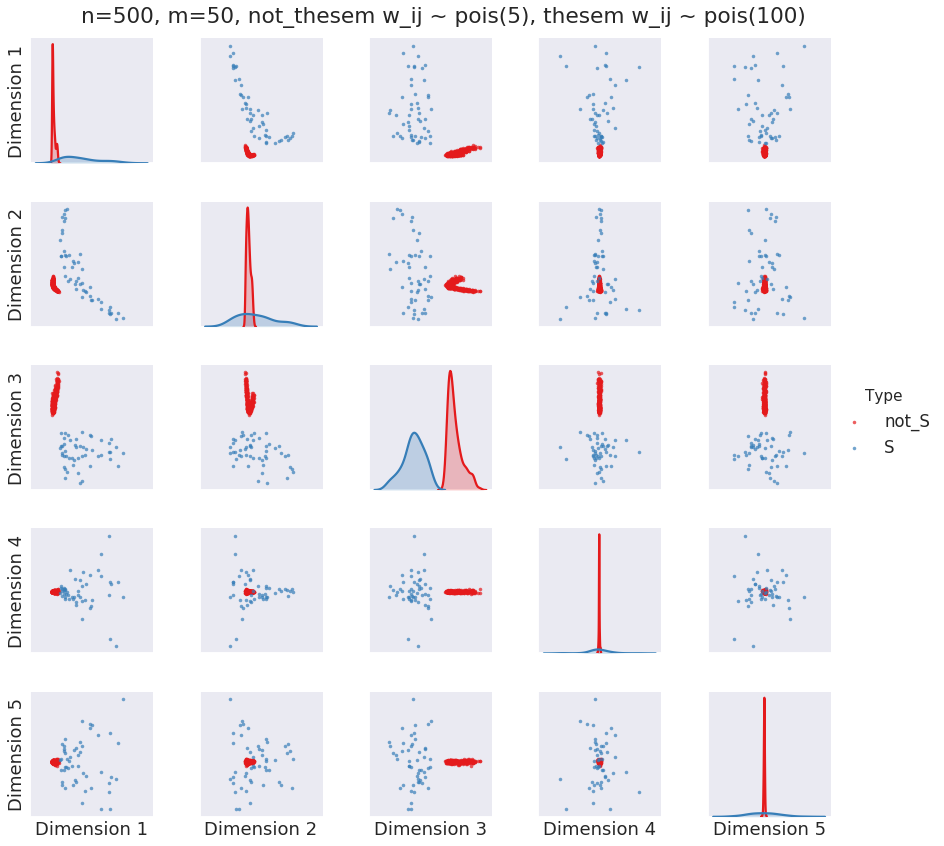

In [17]:
pairplot(ase100.latent_left_[:, :5], c, title='n=%i, m=%i, not_thesem w_ij ~ pois(%i), thesem w_ij ~ pois(%i)'%(n, m, 5, 100))
plt.savefig('pairplots_LSM_n%i_m%i_c%ic%i.png'%(n, m, 5, 100))

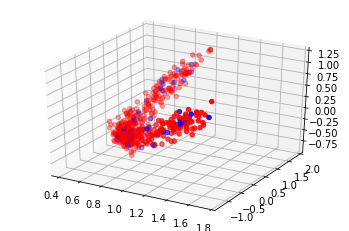

In [103]:
c_ = np.array(['r']*n)
c_[V1] = ['b']*m

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_hat5[:, 0], X_hat5[:, 1], X_hat5[:, 2], c=c_)

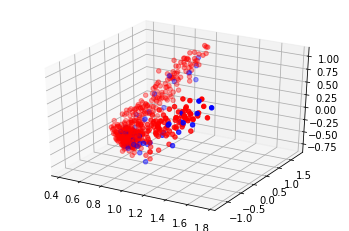

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_hat10[:, 0], X_hat10[:, 1], X_hat10[:, 2], c=c_)

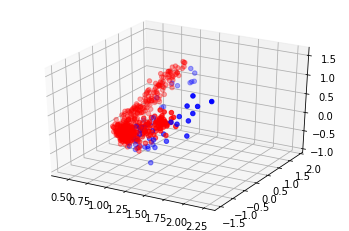

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_hat20[:, 0], X_hat20[:, 1], X_hat20[:, 2], c=c_)

<IPython.core.display.Javascript object>


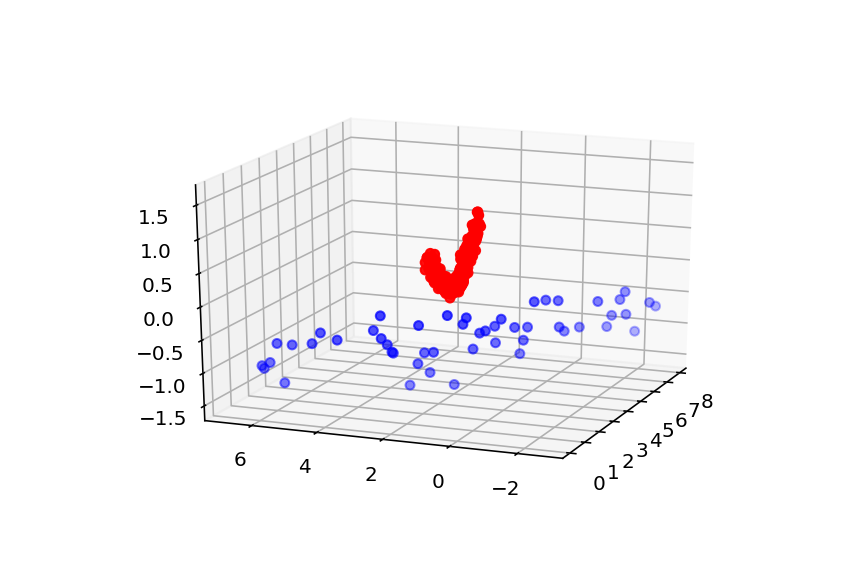

In [115]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_hat100[:, 0], X_hat100[:, 1], X_hat100[:, 2], c=c_)